# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{query_url}{city}"
       
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
    # Add 1 to the record count
    record_count += 1
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =requests.get(city_url).json()
         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
      
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port moresby
Processing Record 2 of Set 1 | port lincoln
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | happy valley-goose bay
Processing Record 5 of Set 1 | hithadhoo
Processing Record 6 of Set 1 | mariinsk
Processing Record 7 of Set 1 | port elizabeth
Processing Record 8 of Set 1 | zheleznodorozhnyy
Processing Record 9 of Set 1 | college
Processing Record 10 of Set 1 | blackmans bay
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | carnarvon
Processing Record 13 of Set 1 | kapa'a
Processing Record 14 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 15 of Set 1 | manokwari
Processing Record 16 of Set 1 | la sarre
Processing Record 17 of Set 1 | puerto natales
Processing Record 18 of Set 1 | saint-philippe
Processing Record 19 of Set 1 | stanley
Processing Record 20 of Set 1 | arraial do cabo
Processing Record 21 of Set 1 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port moresby,-9.4431,147.1797,24.68,94,20,1.54,PG,1715270771
1,port lincoln,-34.7333,135.8667,14.20,79,0,4.53,AU,1715270797
2,port-aux-francais,-49.3500,70.2167,5.25,82,52,10.84,TF,1715270797
3,happy valley-goose bay,53.3168,-60.3315,4.17,65,100,5.14,CA,1715270797
4,hithadhoo,-0.6000,73.0833,29.47,77,100,4.80,MV,1715270797


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port moresby,-9.4431,147.1797,24.68,94,20,1.54,PG,1715270771
1,port lincoln,-34.7333,135.8667,14.20,79,0,4.53,AU,1715270797
2,port-aux-francais,-49.3500,70.2167,5.25,82,52,10.84,TF,1715270797
3,happy valley-goose bay,53.3168,-60.3315,4.17,65,100,5.14,CA,1715270797
4,hithadhoo,-0.6000,73.0833,29.47,77,100,4.80,MV,1715270797


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

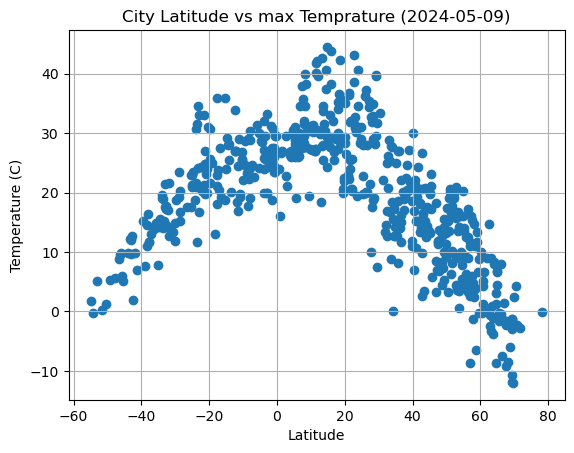

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title(F"City Latitude vs max Temprature ({datetime.date.today()})")
plt.ylabel("Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

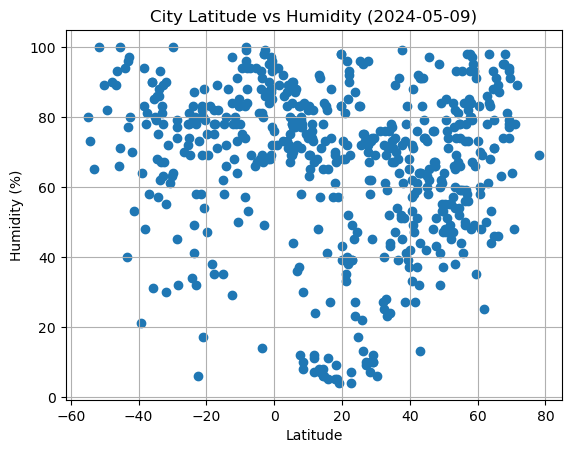

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Humidity ({datetime.date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
           
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

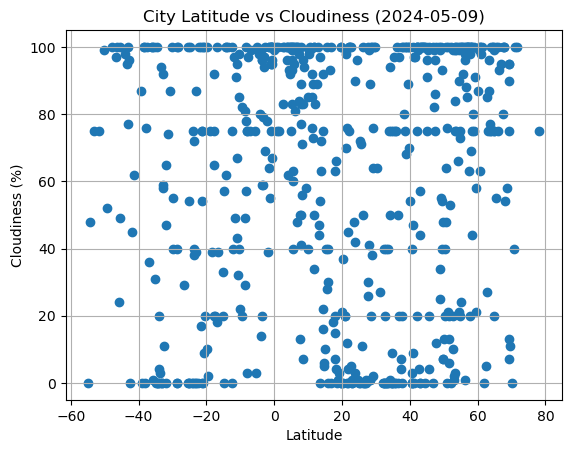

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness ({datetime.date.today()})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

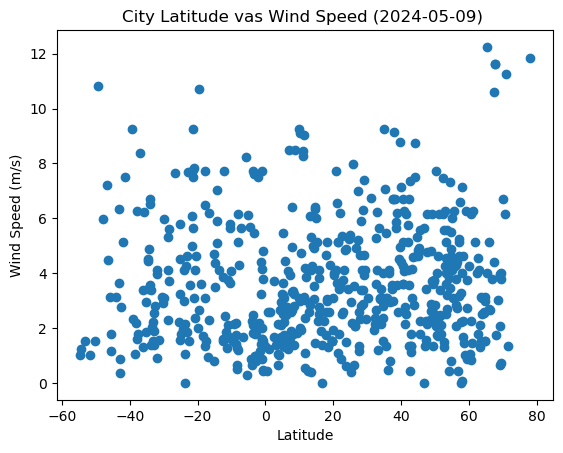

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vas Wind Speed ({datetime.date.today()}) ")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def perform_regression_analysis(data, x, y,hemisphere,xlabel,ylabel):
    x_values=data[x]
    y_values=data[y]
    print(f"The correlation coefficient between {x} and {y} of {hemisphere} is: {round(st.pearsonr(x_values,y_values)[0],2)}")
    
    #linear regression model
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.min()+10,y_values.min()+10),fontsize=15,color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    print(f" The r-squared is: {rvalue**2}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"]>=0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,happy valley-goose bay,53.3168,-60.3315,4.17,65,100,5.14,CA,1715270797
5,mariinsk,56.2139,87.7472,9.03,56,96,2.84,RU,1715270797
7,zheleznodorozhnyy,55.7503,38.0042,6.29,41,92,6.26,RU,1715270798
8,college,64.8569,-147.8028,6.76,71,75,1.54,US,1715270798
12,kapa'a,22.0752,-159.3190,20.61,90,75,3.60,US,1715270537


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"]<0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port moresby,-9.4431,147.1797,24.68,94,20,1.54,PG,1715270771
1,port lincoln,-34.7333,135.8667,14.20,79,0,4.53,AU,1715270797
2,port-aux-francais,-49.3500,70.2167,5.25,82,52,10.84,TF,1715270797
4,hithadhoo,-0.6000,73.0833,29.47,77,100,4.80,MV,1715270797
6,port elizabeth,-33.9180,25.5701,19.16,88,20,6.69,ZA,1715270797


###  Temperature vs. Latitude Linear Regression Plot

The correlation coefficient between Lat and Max Temp of Northern Hemisphere is: -0.83
 The r-squared is: 0.6950495697331962


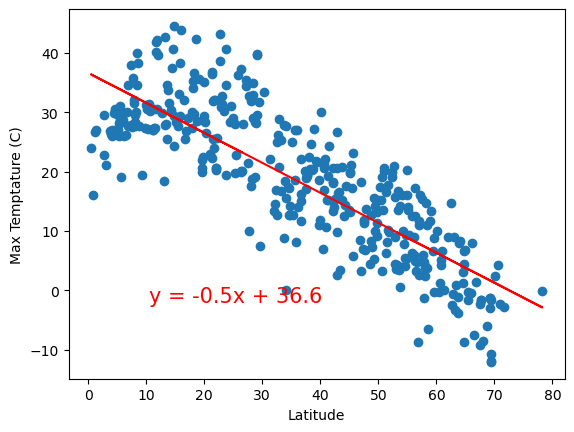

In [15]:
# Linear regression on Northern Hemisphere
perform_regression_analysis(northern_hemi_df,"Lat","Max Temp","Northern Hemisphere","Latitude","Max Temptature (C)")


The correlation coefficient between Lat and Max Temp of Southern Hemisphere is: 0.8
 The r-squared is: 0.6390376321926328


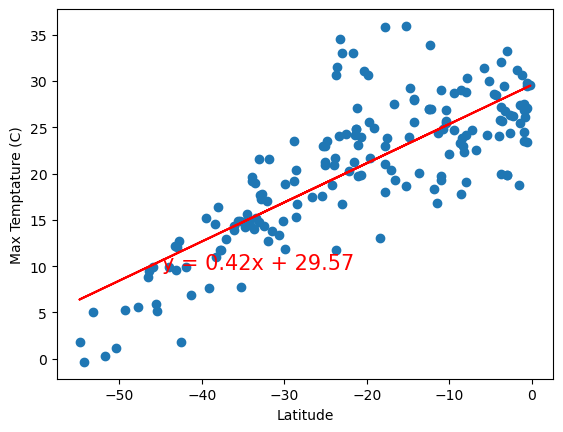

In [16]:
# Linear regression on Southern Hemisphere
perform_regression_analysis(southern_hemi_df,"Lat","Max Temp","Southern Hemisphere","Latitude","Max Temptature (C)")

In [17]:
#Discussion about the linear relationship:
#YOUR RESPONSE HERE
print(f"The correlation coefficient (r) that measures the linear correlation between two variables and the direction of the relationship.")
print(f"This value lies between -1 to +1") 
print(f"Value -1 means strong negative relationship between the two variables and +1 is strong postive and 0 is no relationship") 
print(f"Negative relationship means that when independent variable increases then the value of the dependent variable decreases.")
print(f"Positive  relationship means that when independent variable increases then the value of the dependent variable also decreases.")
print(f"r-squared simply measured fraction of the dependency of the dependent variable on the independent variable.")
print(f"If the dependent variable is highly dependent on all of its independent variables, the value will be close to 1.")
print()
print(f"###### Explanation for Northern Hemisphere maximum tempratue change according to the latitude #######")
print()
print(f"The correlation coefficient between Lat and Max Temp of Northern Hemisphere is: -0.86")
print(f"This mean there is a strong negative realtionship between Northern Hemisphere latitude and the maximum tempratue") 
print(f"Maximum tempratue decreases when the latitude figue increase")
print(f"The r-squared is: 0.744 and this means there is a chance of 74% of changing the max temperature by the changing the latitude of the Northern Hemisphere")
print()
print(f"###### Explanation for Southern Hemisphere maximum tempratue change according to the latitude #######")
print()
print(f"The correlation coefficient between Lat and Max Temp of Southern Hemisphere is: 0.74")
print(f"This mean there is a moderate positive realtionship between Southern Hemisphere latitude and the maximum tempratue")
print(f"Maximum tempratue increases when the latitude figue increase")
print(f"The r-squared is: 0.553 and this means there is a chance of 55% of changing the max temperature by the changing the latitude of the Southern Hemisphere")



The correlation coefficient (r) that measures the linear correlation between two variables and the direction of the relationship.
This value lies between -1 to +1
Value -1 means strong negative relationship between the two variables and +1 is strong postive and 0 is no relationship
Negative relationship means that when independent variable increases then the value of the dependent variable decreases.
Positive  relationship means that when independent variable increases then the value of the dependent variable also decreases.
r-squared simply measured fraction of the dependency of the dependent variable on the independent variable.
If the dependent variable is highly dependent on all of its independent variables, the value will be close to 1.

###### Explanation for Northern Hemisphere maximum tempratue change according to the latitude #######

The correlation coefficient between Lat and Max Temp of Northern Hemisphere is: -0.86
This mean there is a strong negative realtionship between 

### Humidity vs. Latitude Linear Regression Plot

The correlation coefficient between Lat and Humidity of Northern Hemisphere is: 0.13
 The r-squared is: 0.015867690872227558


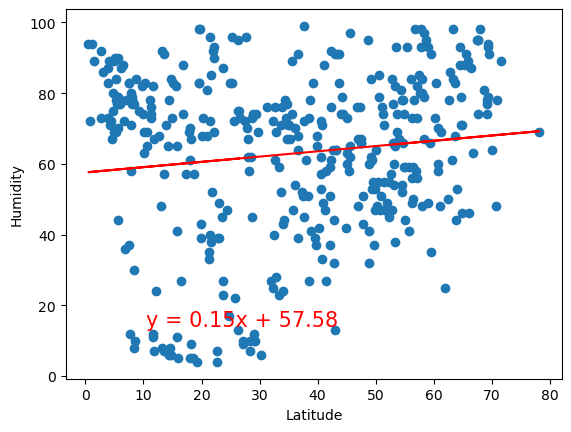

In [18]:
# Northern Hemisphere
perform_regression_analysis(northern_hemi_df,"Lat","Humidity","Northern Hemisphere","Latitude","Humidity")


The correlation coefficient between Lat and Humidity of Southern Hemisphere is: 0.09
 The r-squared is: 0.00884493224268088


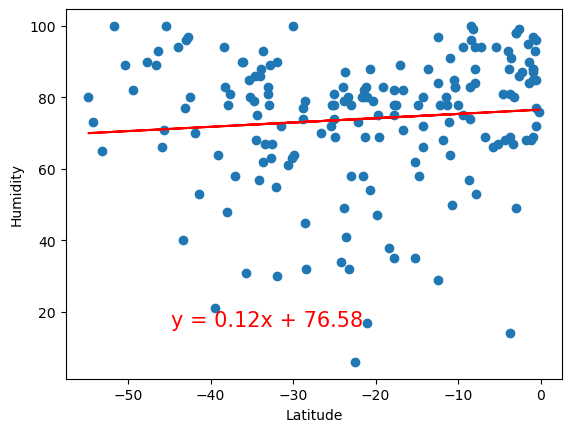

In [19]:
# Southern Hemisphere
perform_regression_analysis(southern_hemi_df,"Lat","Humidity","Southern Hemisphere","Latitude","Humidity")

In [20]:
#**Discussion about the linear relationship:** YOUR RESPONSE HERE
print(f"###### Explanation for Northern Hemisphere Humidity change according to the latitude #######")
print()
print(f"The correlation coefficient between Lat and Humidity of Northern Hemisphere is: 0.1")
print(f"This mean there is a weak (or no relationship) positive realtionship between Northern Hemisphere latitude and the Humidity") 
print(f"The r-squared is: 0.0093 and this means there is a rare chance of 0.9% of changing the Humidity by the changing the latitude of the Northern Hemisphere")
print()
print(f"###### Explanation for Southern Hemisphere Humidity change according to the latitude #######")
print()
print(f"The correlation coefficient between Lat and Humidity of Southern Hemisphere is: 0.24")
print(f"This mean there is a weak positive realtionship between Southern Hemisphere latitude and the Humidity")
print(f"Humidity might increases when the latitude figue increase")
print(f"The r-squared is:  0.0558 and this means there is a chance of 5% of changing the Humidity by the changing the latitude of the Southern Hemisphere")


###### Explanation for Northern Hemisphere Humidity change according to the latitude #######

The correlation coefficient between Lat and Humidity of Northern Hemisphere is: 0.1
This mean there is a weak (or no relationship) positive realtionship between Northern Hemisphere latitude and the Humidity
The r-squared is: 0.0093 and this means there is a rare chance of 0.9% of changing the Humidity by the changing the latitude of the Northern Hemisphere

###### Explanation for Southern Hemisphere Humidity change according to the latitude #######

The correlation coefficient between Lat and Humidity of Southern Hemisphere is: 0.24
This mean there is a weak positive realtionship between Southern Hemisphere latitude and the Humidity
Humidity might increases when the latitude figue increase
The r-squared is:  0.0558 and this means there is a chance of 5% of changing the Humidity by the changing the latitude of the Southern Hemisphere


### Cloudiness vs. Latitude Linear Regression Plot

The correlation coefficient between Lat and Cloudiness of Northern Hemisphere is: 0.05
 The r-squared is: 0.0023639938726529278


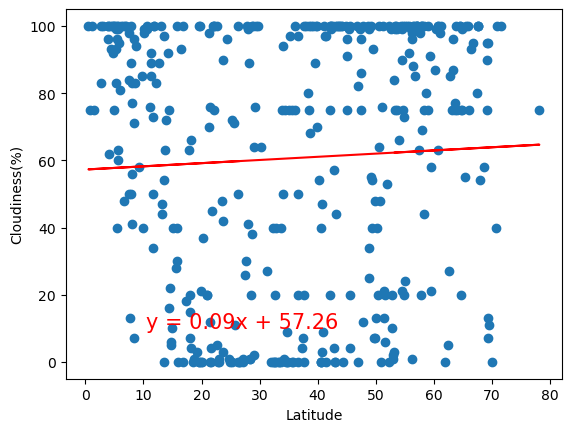

In [21]:
# Northern Hemisphere
perform_regression_analysis(northern_hemi_df,"Lat","Cloudiness","Northern Hemisphere","Latitude","Cloudiness(%)")

The correlation coefficient between Lat and Cloudiness of Southern Hemisphere is: 0.19
 The r-squared is: 0.03699061818925502


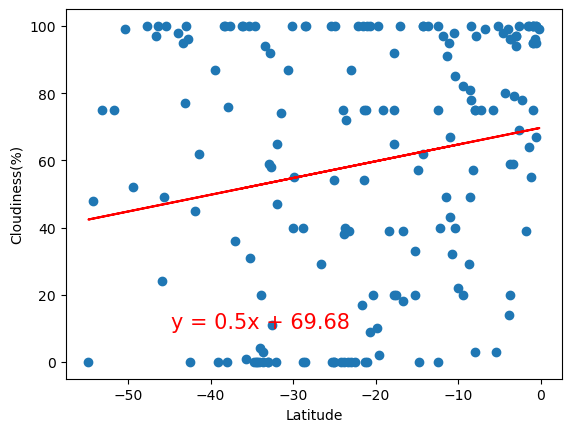

In [22]:
# Southern Hemisphere
perform_regression_analysis(southern_hemi_df,"Lat","Cloudiness","Southern Hemisphere","Latitude","Cloudiness(%)")

In [23]:
#**Discussion about the linear relationship:** YOUR RESPONSE HERE
print(f"###### Explanation for Northern Hemisphere Cloudiness change according to the latitude #######")
print()
print(f"The correlation coefficient between Lat and Cloudiness of Northern Hemisphere is: 0.05")
print(f"This mean there is a weak (or no relationship) positive realtionship between Northern Hemisphere latitude and the Cloudiness") 
print(f"The r-squared is: 0.0029 and this means there is a rare chance of 0.2% of changing the Cloudiness by the changing the latitude of the Northern Hemisphere")
print()
print(f"###### Explanation for Southern Hemisphere Cloudiness change according to the latitude #######")
print()
print(f"The correlation coefficient between Lat and Cloudiness of Southern Hemisphere is: 0.24")
print(f"This mean there is a weak positive realtionship between Southern Hemisphere latitude and the Cloudiness")
print(f"Cloudiness might increases when the latitude figue increase")
print(f"The r-squared is:  0.0553 and this means there is a chance of 5% of changing the Cloudiness by the changing the latitude of the Southern Hemisphere")


###### Explanation for Northern Hemisphere Cloudiness change according to the latitude #######

The correlation coefficient between Lat and Cloudiness of Northern Hemisphere is: 0.05
This mean there is a weak (or no relationship) positive realtionship between Northern Hemisphere latitude and the Cloudiness
The r-squared is: 0.0029 and this means there is a rare chance of 0.2% of changing the Cloudiness by the changing the latitude of the Northern Hemisphere

###### Explanation for Southern Hemisphere Cloudiness change according to the latitude #######

The correlation coefficient between Lat and Cloudiness of Southern Hemisphere is: 0.24
This mean there is a weak positive realtionship between Southern Hemisphere latitude and the Cloudiness
Cloudiness might increases when the latitude figue increase
The r-squared is:  0.0553 and this means there is a chance of 5% of changing the Cloudiness by the changing the latitude of the Southern Hemisphere


### Wind Speed vs. Latitude Linear Regression Plot

The correlation coefficient between Lat and Wind Speed of Northern Hemisphere is: 0.15
 The r-squared is: 0.021489501188507787


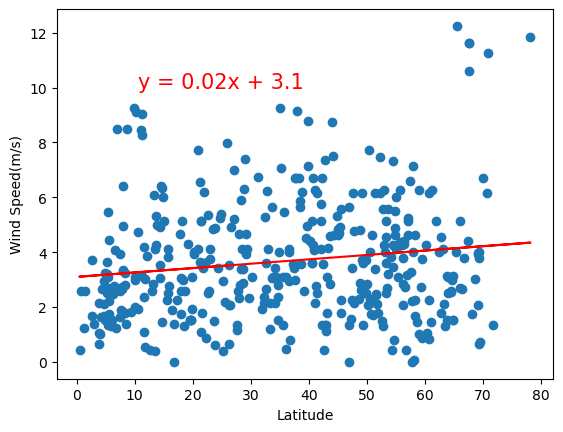

In [24]:
# Northern Hemisphere
perform_regression_analysis(northern_hemi_df,"Lat","Wind Speed","Northern Hemisphere","Latitude","Wind Speed(m/s)")

The correlation coefficient between Lat and Wind Speed of Southern Hemisphere is: -0.08
 The r-squared is: 0.007019158758898952


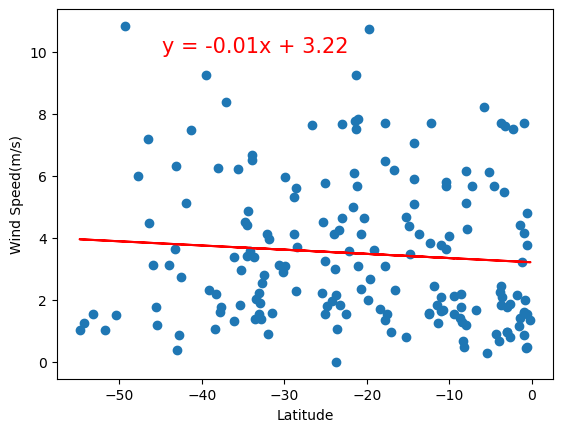

In [25]:
# Southern Hemisphere
perform_regression_analysis(southern_hemi_df,"Lat","Wind Speed","Southern Hemisphere","Latitude","Wind Speed(m/s)")

In [26]:
#**Discussion about the linear relationship:** YOUR RESPONSE HERE
print(f"###### Explanation for Northern Hemisphere Wind Speed change according to the latitude #######")
print()
print(f"The correlation coefficient between Lat and Wind Speed of Northern Hemisphere is: 0.16")
print(f"This mean there is a weak (or no relationship) positive realtionship between Northern Hemisphere latitude and the Wind Speed") 
print(f"The r-squared is: 0.0264 and this means there is a rare chance of 2% of changing the Wind Speed by the changing the latitude of the Northern Hemisphere")
print()
print(f"###### Explanation for Southern Hemisphere Wind Speed change according to the latitude #######")
print()
print(f"The correlation coefficient between Lat and Wind Speed of Southern Hemisphere is: -0.16")
print(f"This mean there is a weak negative realtionship between Southern Hemisphere latitude and the Wind Speed")
print(f"Wind Speed might decreases when the latitude figue increase")
print(f"The r-squared is: 0.0254 and this means there is a rare chance of 5% of changing the Wind Speed by the changing the latitude of the Southern Hemisphere")



###### Explanation for Northern Hemisphere Wind Speed change according to the latitude #######

The correlation coefficient between Lat and Wind Speed of Northern Hemisphere is: 0.16
This mean there is a weak (or no relationship) positive realtionship between Northern Hemisphere latitude and the Wind Speed
The r-squared is: 0.0264 and this means there is a rare chance of 2% of changing the Wind Speed by the changing the latitude of the Northern Hemisphere

###### Explanation for Southern Hemisphere Wind Speed change according to the latitude #######

The correlation coefficient between Lat and Wind Speed of Southern Hemisphere is: -0.16
This mean there is a weak negative realtionship between Southern Hemisphere latitude and the Wind Speed
Wind Speed might decreases when the latitude figue increase
The r-squared is: 0.0254 and this means there is a rare chance of 5% of changing the Wind Speed by the changing the latitude of the Southern Hemisphere
